<a href="https://colab.research.google.com/github/pritesh2292/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, model_selection, metrics
from sklearn import datasets, linear_model, metrics
from sklearn import ensemble

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date'])

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.shape

(19735, 29)

In [6]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
df.head

<bound method NDFrame.head of                      date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.79000

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
print('The number of rows in dataset is - ' , df.shape[0])
print('The number of columns in dataset is - ' , df.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [10]:
#Number of null values in all columns
df.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [12]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [13]:
#Function to convert categorical data to label encoding(We are not using Onehot encoders as the variable is ordinal)
def conditions(df):
    if (df['Tdewpoint']== 'LDT'):
        return 0
    elif (df['Tdewpoint']== 'ADT'):
        return 1
    elif (df['Tdewpoint']== 'NDT'):
        return 2
    else:
        return 3    

df['Tdewpoint']= df.apply(conditions, axis=1)

In [14]:
#Missing data visualization
pd.DataFrame(df.isna().sum(), columns=["records missing"]).T

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
records missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [16]:
feature_vars = df[col_temp + col_hum + col_weather + col_randoms] 
target_vars = df[col_target]

In [17]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.0,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,40.259739,...,42.936165,41.552401,7.411665,3.0,79.750418,755.522602,4.039752,38.330834,24.988033,24.988033
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,3.979299,...,5.224361,4.151497,5.317409,0.0,14.901088,7.399441,2.451221,11.794719,14.496634,14.496634
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.023333,...,29.600000,29.166667,-5.000000,3.0,24.000000,729.300000,0.000000,1.000000,0.005322,0.005322
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,37.333333,...,39.066667,38.500000,3.666667,3.0,70.333333,750.933333,2.000000,29.000000,12.497889,12.497889
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,39.656667,...,42.375000,40.900000,6.916667,3.0,83.666667,756.100000,3.666667,40.000000,24.897653,24.897653
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,43.066667,...,46.536000,44.338095,10.408333,3.0,91.666667,760.933333,5.500000,40.000000,37.583769,37.583769
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,63.360000,...,58.780000,53.326667,26.100000,3.0,100.000000,772.300000,14.000000,66.000000,49.996530,49.996530


In [18]:
target_vars.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [21]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
0,19.89,19.2,19.79,19.0,17.166667,7.026667,17.2,18.2,17.033333,47.596667,...,48.900000,45.53,6.600000,3,92.0,733.5,7.000000,63.000000,13.275433,13.275433
1,19.89,19.2,19.79,19.0,17.166667,6.833333,17.2,18.2,17.066667,46.693333,...,48.863333,45.56,6.483333,3,92.0,733.6,6.666667,59.166667,18.606195,18.606195


#Data Visualization

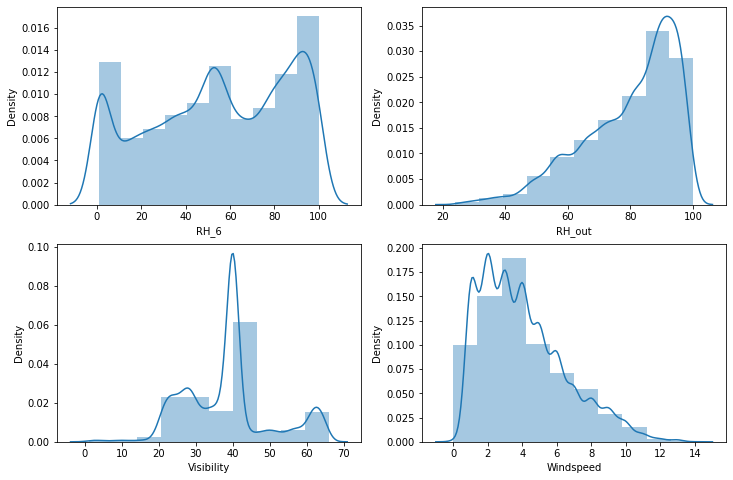

In [22]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

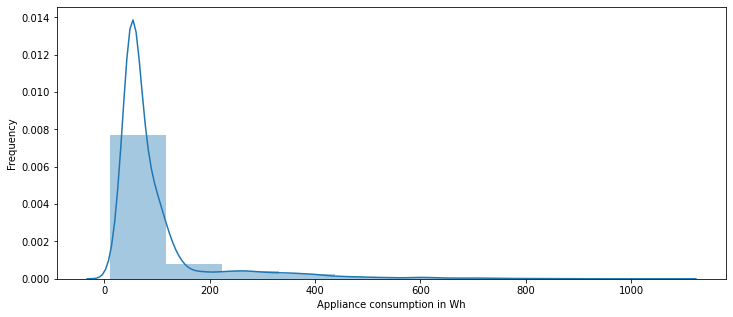

In [23]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [24]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.291361
dtype: float64


In [27]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16) ;

SyntaxError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc25a628940>]],
      dtype=object)

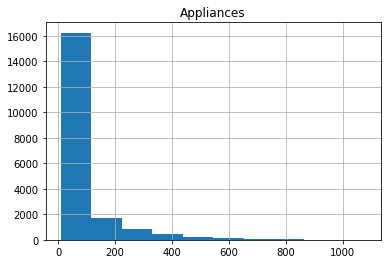

In [26]:
#Distribution of values in Applainces column
target_vars.hist()